<br>
<font color='darkred', size="6">
    <center>
        <b> Pima indians diabetes </b>
    </center>
</font>

데이터셋:[Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

# 라이브러리 및 데이터 로드

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**칼럼 의미** <br/>
Pregnancies: 임신 횟수 <br/>
Glucose: 포도당 부하 검사 수치 <br/>
BloodPressure: 혈압(mm Hg) <br/>
SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm) <br/>
Insulin: 혈청 인슐린(mu U/ml) <br/>
BMI: 체질량지수(체중(kg)/(키(m))^2) <br/>
DiabetesPedigreeFunction: 당뇨 내력 가중치 값 <br/>
Age: 나이 <br/>
Outcome: 클래스 결정 값(0또는 1) <br/>

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Logistic Regression으로 학습 및 예측

In [13]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 216, stratify=y)

# 학습 및 예측
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 이진분류 평가지표 함수

In [9]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred) 
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

# 학습 및 예측 평가

In [14]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[90 10]
 [31 23]]
정확도: 0.7338, 정밀도: 0.6970, 재현율: 0.4259,    F1: 0.5287, AUC:0.8083


# precision recall 곡선 그림

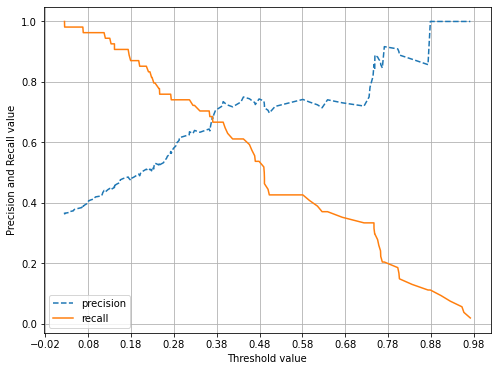

In [15]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

# 각 피쳐들의 값 4분위 분포 확인

In [16]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 수상한 피쳐들 분포도 확인

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

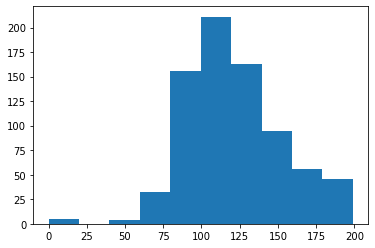

In [17]:
plt.hist(diabetes_data["Glucose"])

# 0값이 있는 피쳐들의 0값의 데이터 건수와 퍼센트 계산

In [24]:
# 0값 피쳐 리스트
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Outcome'].count()

# 피쳐 별 0값 데이터 퍼센트
for idx, zero_feature in enumerate(zero_features):
    zero_count = diabetes_data[diabetes_data[zero_feature] == 0][zero_feature].count()
    percent = (zero_count / total_count)*100
    
    print(f"{zero_feature}의 0값 데이터 건수 퍼센트:{round(percent,3)}")

Glucose의 0값 데이터 건수 퍼센트:0.651
BloodPressure의 0값 데이터 건수 퍼센트:4.557
SkinThickness의 0값 데이터 건수 퍼센트:29.557
Insulin의 0값 데이터 건수 퍼센트:48.698
BMI의 0값 데이터 건수 퍼센트:1.432


# 0값을 평균값으로 대체

In [25]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

# StandatdScaler 스케일링

In [26]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 전처리한 데이터 세트로 학습 및 예측

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 216, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 평가지표 확인

In [28]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[92  8]
 [28 26]]
정확도: 0.7662, 정밀도: 0.7647, 재현율: 0.4815,    F1: 0.5909, AUC:0.8269


# 분류결정 임곗값을 변경하면서 성능 측정

In [30]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)    

In [31]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[74 26]
 [15 39]]
정확도: 0.7338, 정밀도: 0.6000, 재현율: 0.7222,    F1: 0.6555, AUC:0.8269
임곗값: 0.33
오차 행렬
[[83 17]
 [16 38]]
정확도: 0.7857, 정밀도: 0.6909, 재현율: 0.7037,    F1: 0.6972, AUC:0.8269
임곗값: 0.36
오차 행렬
[[84 16]
 [19 35]]
정확도: 0.7727, 정밀도: 0.6863, 재현율: 0.6481,    F1: 0.6667, AUC:0.8269
임곗값: 0.39
오차 행렬
[[87 13]
 [20 34]]
정확도: 0.7857, 정밀도: 0.7234, 재현율: 0.6296,    F1: 0.6733, AUC:0.8269
임곗값: 0.42
오차 행렬
[[88 12]
 [21 33]]
정확도: 0.7857, 정밀도: 0.7333, 재현율: 0.6111,    F1: 0.6667, AUC:0.8269
임곗값: 0.45
오차 행렬
[[90 10]
 [22 32]]
정확도: 0.7922, 정밀도: 0.7619, 재현율: 0.5926,    F1: 0.6667, AUC:0.8269
임곗값: 0.48
오차 행렬
[[92  8]
 [25 29]]
정확도: 0.7857, 정밀도: 0.7838, 재현율: 0.5370,    F1: 0.6374, AUC:0.8269
임곗값: 0.5
오차 행렬
[[92  8]
 [28 26]]
정확도: 0.7662, 정밀도: 0.7647, 재현율: 0.4815,    F1: 0.5909, AUC:0.8269


In [33]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.5)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

# roc_auc_score 관련 수정
get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[92  8]
 [28 26]]
정확도: 0.7662, 정밀도: 0.7647, 재현율: 0.4815,    F1: 0.5909, AUC:0.8269
